# Datos del Ministerio del Interior 2018
## Seguridad y violencia basada en género

datos extraidos de: https://catalogodatos.gub.uy/dataset/seguridad_y_violencia_en_genero_ministerio_interior

github: https://github.com/johnblanco/ipn-violencia-genero

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from funciones import fix_situacion, fix_fecha, add_columns, change_abuso, by_population

In [63]:
plt.rcParams['figure.figsize'] = [12, 5]

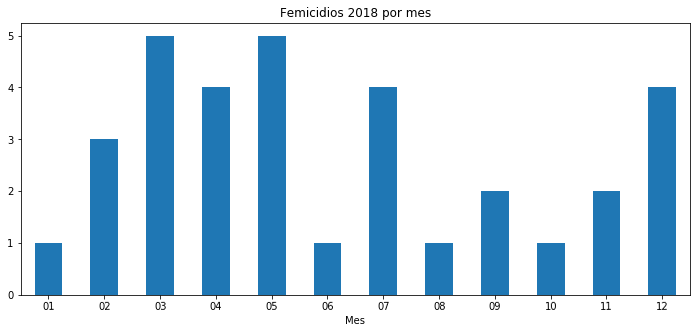

In [64]:
pob_deptos = pd.read_csv('poblacion_deptos.txt',encoding = "ISO-8859-1",index_col='departamento')
df = pd.read_csv('homicidios-domsticos-a-mujeres.csv',encoding = "ISO-8859-1")
df['situacion_victimario'] = df['Situación del victimario'].apply(lambda x: fix_situacion(x))
df['Departamento'] = df.Departamento.apply(lambda x: x.upper())
df['Mes'] = df['Mes'].apply(lambda x: fix_fecha(x)) 
df.drop(columns=['Situación del victimario'],inplace=True)
df.groupby('Mes').size().plot.bar(title='Femicidios 2018 por mes',rot=1)

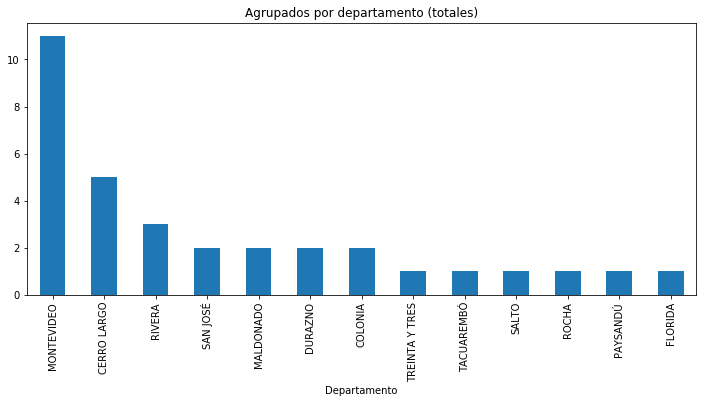

In [65]:
df.groupby('Departamento').size().sort_values(ascending=False).plot.bar(title='Agrupados por departamento (totales)')

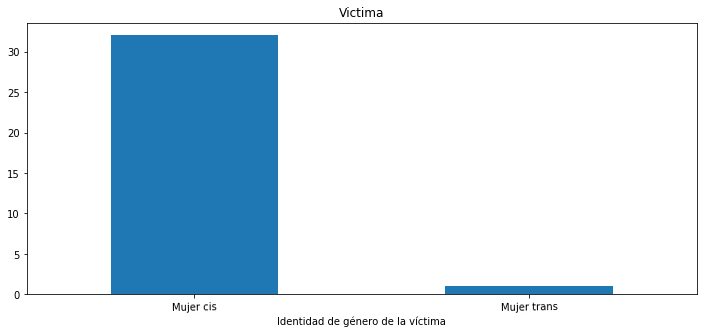

In [66]:
df.groupby('Identidad de género de la víctima').size().plot.bar(title='Victima',rot=1)

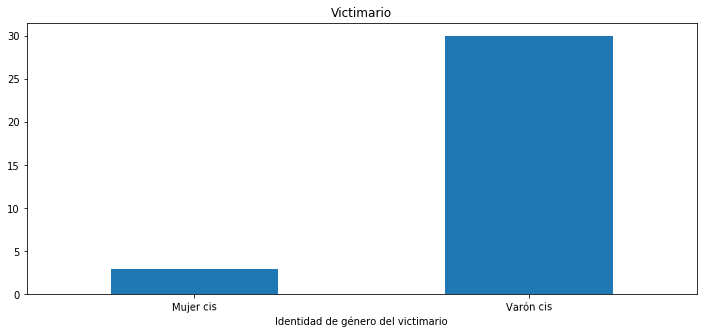

In [67]:
df.groupby('Identidad de género del victimario').size().plot.bar(title='Victimario',rot=1)

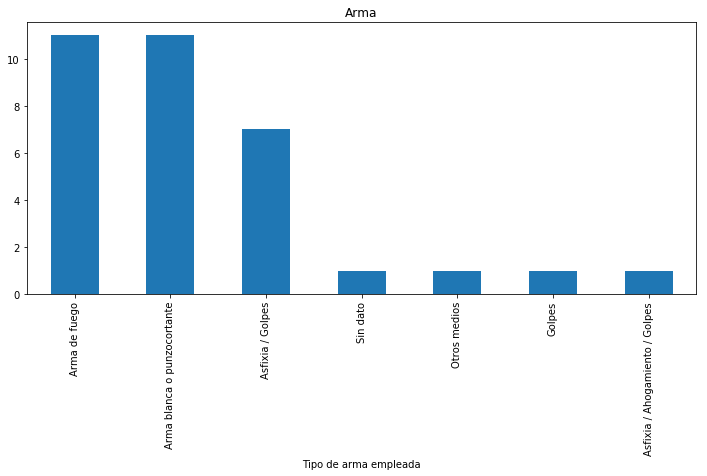

In [68]:
df.groupby('Tipo de arma empleada').size().sort_values(ascending=False).plot.bar(title='Arma')

Nota: En el csv se repite Asfixia en 2 categorias: *Asfixia / Golpes* y en la categoria *Asfixia / Ahogamiento / Golpes*. Teoria: las variables combinadas deben ser que la victima sufrió todos esos sucesos.

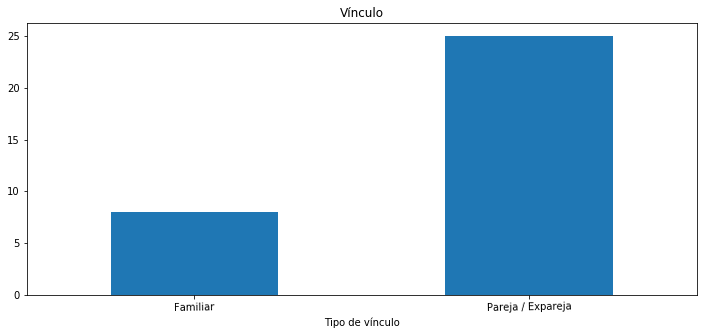

In [69]:
df.groupby('Tipo de vínculo').size().plot.bar(title='Vínculo',rot=1)

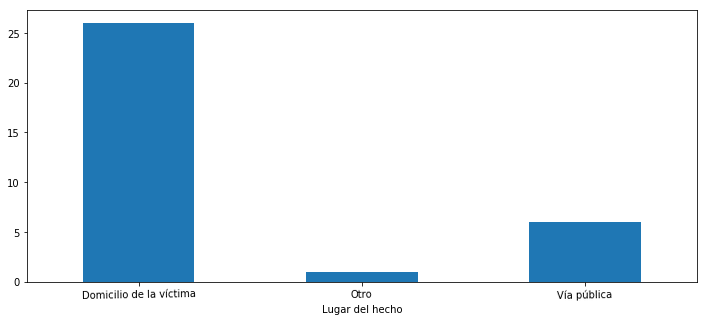

In [70]:
df.groupby('Lugar del hecho').size().plot.bar(rot=1)

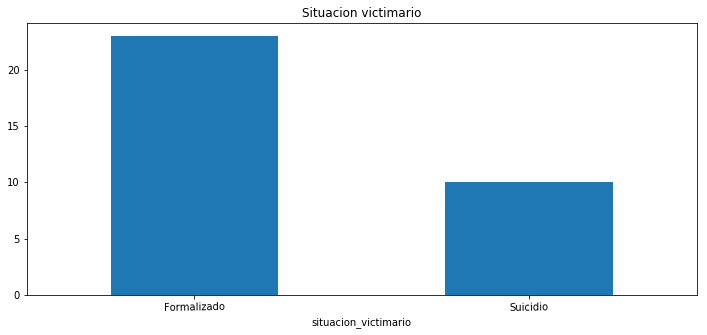

In [71]:
df.groupby('situacion_victimario').size().plot.bar(rot=1,title="Situacion victimario")

Para analizar: ¿Existe correlacion entre el suicidio del victimario y el tipo de arma empleada?

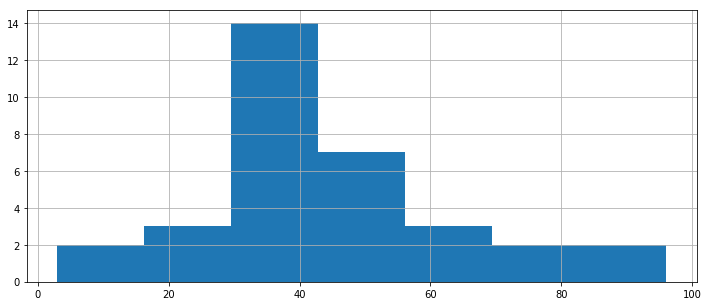

In [72]:
df['Edad de la víctima'].hist(bins=7)

El rango con mayor frecuencia de victimas es entre 30 y 40 años.

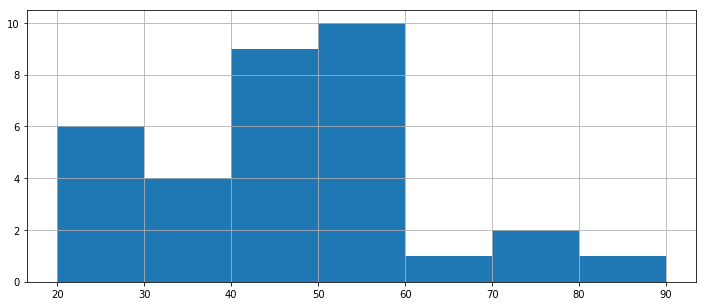

In [73]:
df['Edad del victimario'].hist(bins=7)

Los victimarios tienen una edad más grande que las victimas

In [74]:
df2 = pd.read_csv('delitos-sexuales-por-edad-y-ao.csv',encoding = "ISO-8859-1", index_col='Edad')
df2 = df2[df2.index < 50]

In [75]:
df2['abuso_sexual_varones'] = df2.apply(lambda row: add_columns(row, 'varones'),axis=1)
df2['abuso_sexual_mujeres'] = df2.apply(lambda row: add_columns(row, 'mujeres'),axis=1)

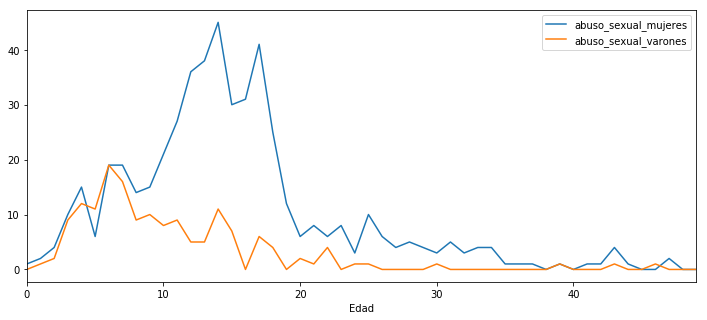

In [76]:
df2.plot.line(y=['abuso_sexual_mujeres','abuso_sexual_varones'])

A los 7 años aprox. se ve que el abuso sexual no distingue varones o mujeres. A los 14 años es muy diferente la distribucion

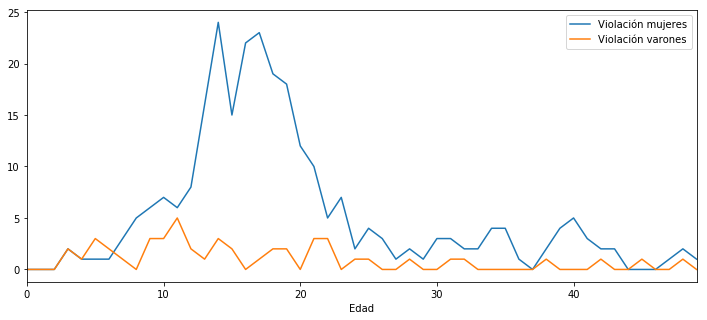

In [77]:
df2.plot.line(y=['Violación mujeres','Violación varones'])

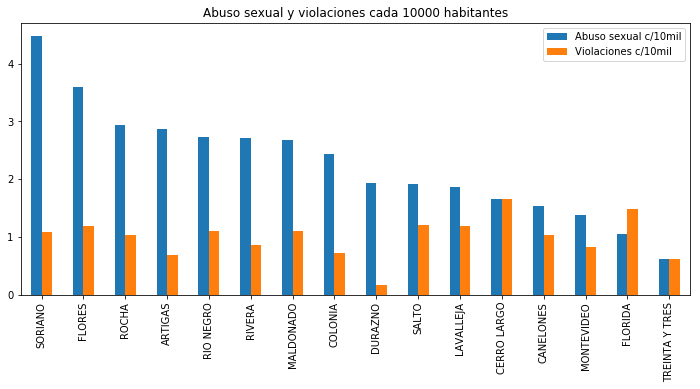

In [78]:
df3 = pd.read_csv('delitos-sexuales-por-departamento-y-ao.csv',encoding = "ISO-8859-1", index_col='Departamento')
df3 = df3.merge(pob_deptos,left_index=True,right_index=True)
df3['Abuso sexual'] = df3.apply(lambda row: change_abuso(row),axis=1)
df3['Abuso sexual c/10mil'] = df3.apply(lambda row: by_population(row,'Abuso sexual'),axis=1)
df3['Violaciones c/10mil'] = df3.apply(lambda row: by_population(row,'Violación'),axis=1)
df3[['Abuso sexual c/10mil','Violaciones c/10mil']].sort_values(by='Abuso sexual c/10mil',ascending=False).plot.bar(title='Abuso sexual y violaciones cada 10000 habitantes')


Poblacion de departamentos en base al censo de 2011

Soriano tiene el doble de casos que Montevideo si vemos los numeros en proporcion a la población.

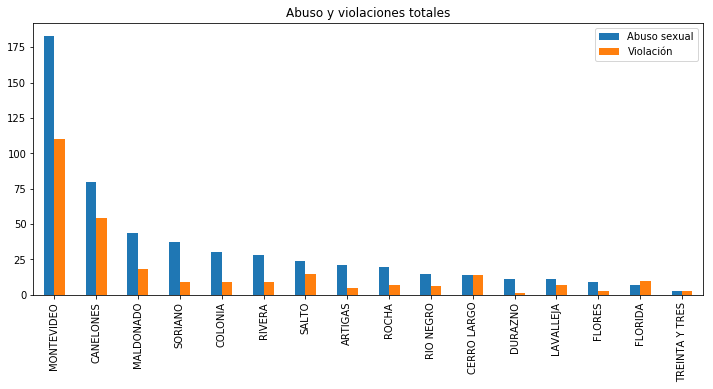

In [79]:
df3[['Abuso sexual','Violación']].sort_values(by='Abuso sexual',ascending=False).plot.bar(title='Abuso y violaciones totales')

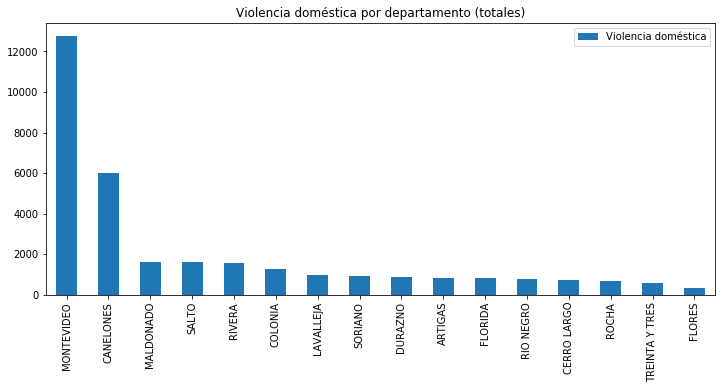

In [80]:
df4 = pd.read_csv('violencia-domestica-y-asociados-por-departamento-y-ao.csv',encoding = "ISO-8859-1", index_col='Departamento')
df4 = df4.merge(pob_deptos,left_index=True,right_index=True)
df4['Violencia doméstica c/10mil'] = df4.apply(lambda row: by_population(row,'Violencia doméstica'),axis=1)
df4.drop(columns=['Anio'],inplace=True)
df4[['Violencia doméstica']].sort_values(by='Violencia doméstica',ascending=False).plot.bar(title='Violencia doméstica por departamento (totales)')

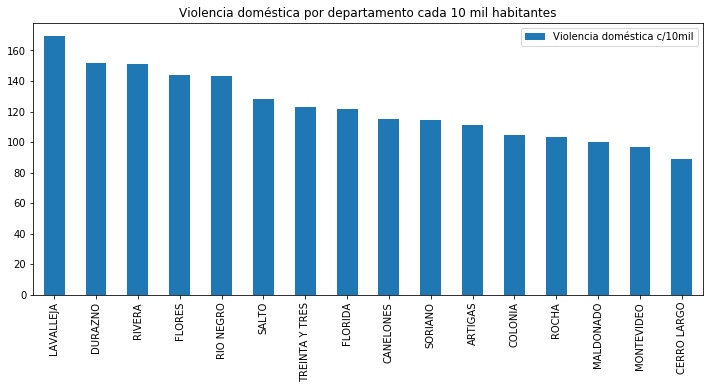

In [81]:
df4[['Violencia doméstica c/10mil']].sort_values(by='Violencia doméstica c/10mil',ascending=False).plot.bar(title='Violencia doméstica por departamento cada 10 mil habitantes')